maximum level is 6


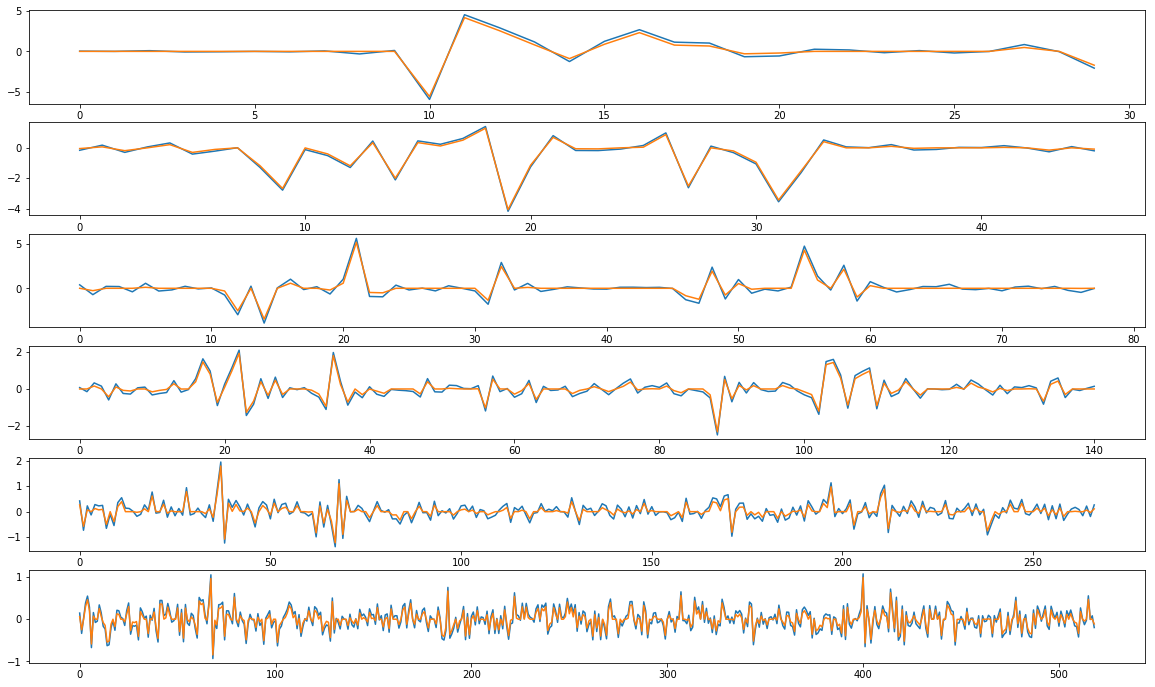

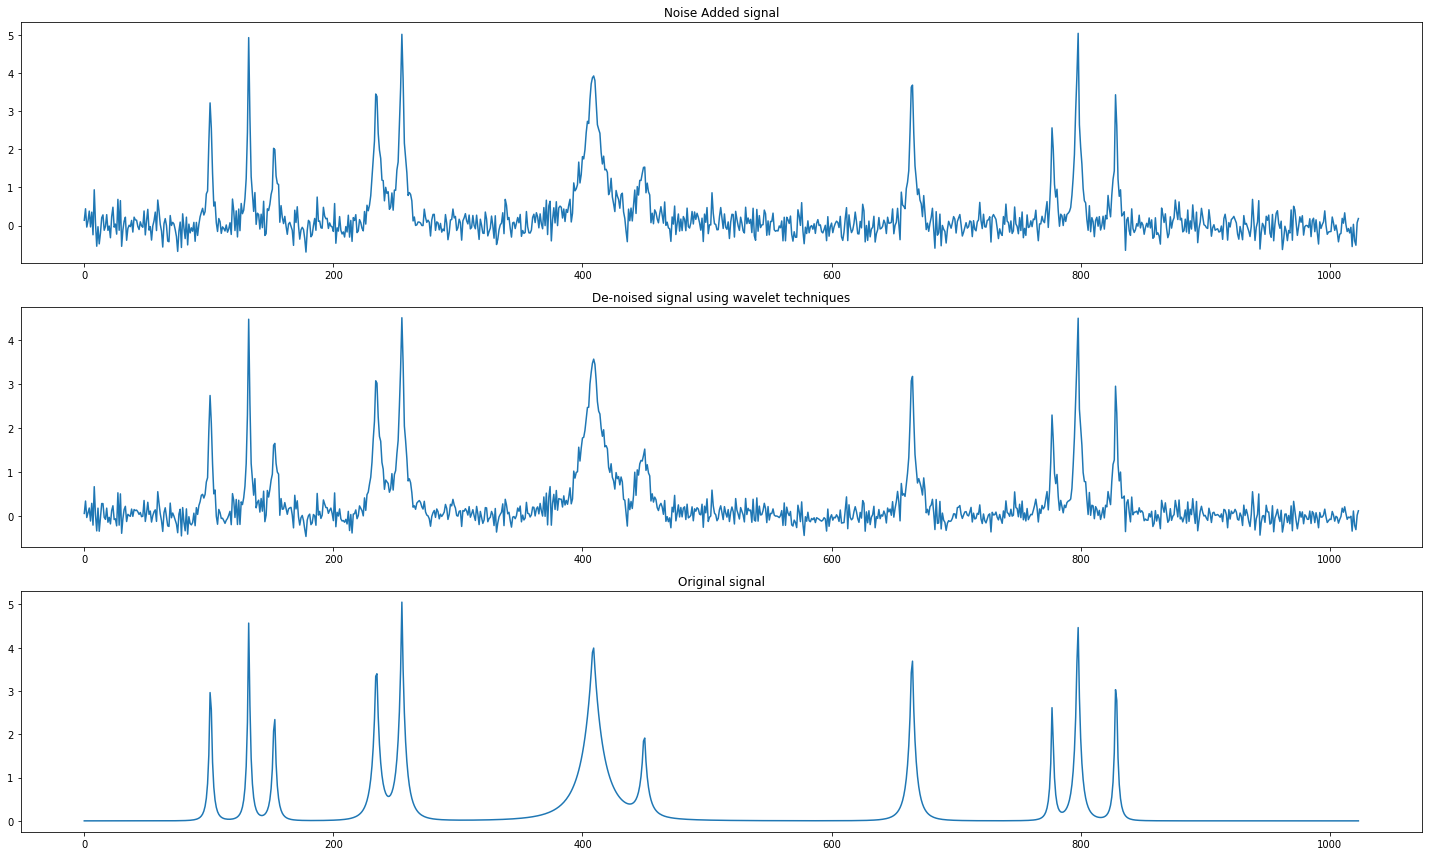

noise added mse = 0.06357486716921759
mse = 0.03777550781662925


In [40]:
import matplotlib.pyplot as plt
import pywt
import sys
import numpy as np

# Data format:
# Raw data should be in a .txt file with two columns, separated by tabs:
#  - The first column should be a time-series index
#  - The second column should contain the data to be filtered

length_signal = 1024
orig_data = pywt.data.demo_signal(name='bumps', n=length_signal)
std_noise = 0.25
avg_noise = 0
noise = np.random.normal(avg_noise,std_noise,length_signal) # média = 0, variância = 0.25 => ruído branco
data = orig_data + noise
index = range(len(data))
threshold = 0.08 # Threshold for filtering
wav_name = 'db8'
noise_component_qty = 1

wavelet_denoise(data, orig_data)


In [38]:
def wavelet_denoise(data, orig_data):

    # Create wavelet object and define parameters
    w = pywt.Wavelet(wav_name)
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    # maxlev = 2 # Override if desired
    print("maximum level is " + str(maxlev))

    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, wav_name, level=maxlev)

    #cA = pywt.threshold(cA, threshold*max(cA))
    plt.figure(figsize=(20, 12))
    for i in range(1, len(coeffs)):
        plt.subplot(maxlev, 1, i)
        plt.plot(coeffs[i])
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        plt.plot(coeffs[i])

    datarec = pywt.waverec(coeffs, wav_name)

    mintime = 0
    maxtime = len(index)

    plt.figure(figsize=(20,12))
    plt.subplot(3, 1, 1)
    plt.plot(index[mintime:maxtime], data[mintime:maxtime])
    plt.title("Noise Added signal")
    plt.subplot(3, 1, 2)
    plt.plot(index[mintime:maxtime], datarec[mintime:maxtime])
    plt.title("De-noised signal using wavelet techniques")
    plt.subplot(3, 1, 3)
    plt.plot(index[mintime:maxtime], orig_data[mintime:maxtime])
    plt.title("Original signal")

    plt.tight_layout()
    plt.show()

    print(f'noise added mse = {mse_numpy(data, orig_data)}')
    print(f'mse = {mse_numpy(datarec, orig_data)}')
    
def mse_numpy(data_1, data_2):
        return np.square(np.subtract(data_1,data_2)).mean() 